# 第15組 母親節快樂

組員名單

M124020022 林咨妤資管所

M124020037 張哲睿資管所

M124020043 劉捷生資管所

B084011022 王煜凱企管系


## 報告影片連結：https://www.youtube.com/watch?v=NOhuaMte4y8&ab_channel=%E7%8E%8B%E7%85%9C%E5%87%B1

# 主題：分析Data Science Interviews資料集，得到面試時的準備方向

#一、動機和分析目的

## 1.動機

有鑑於我們這組成員包含研究所和大五的學生，我們在討論時突發奇想，不如來找找看有沒有面試的題目和答案可以供我們分析，這樣對於未來找工作或許可以有幫助。


## 2.分析目的
我們希望可以透過分析這筆資料得到以下結果

a. 了解面試題目類型、趨勢

b. 提升答題能力

c. 了解自身的不足

# 二、資料集的描述

資料來源：https://github.com/kyoto-cheng/NLP-on-Data-Science-Interviews-Questions

此資料共有323比資料，每筆皆包含Category、Questions、Answers:

Category：描述該問代表的主題、方向。

Questions：由面試官提出的問題，以資料科學領域為主。

Answers：根據不同的Questions做出答覆，包含名詞解釋、應用方法、演算法過程。

# 三、資料分析過程

## 1.文字雲


我們希望透過文字雲迅速了解與特定主題經常一起出現的字詞。

In [ ]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, feature_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt


nltk.download('wordnet')
nltk.download('punkt')

lemma = nltk.wordnet.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# 連結google drive

import os

from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/SMA_final_project') #切換該目錄
os.listdir() #確認目錄內容

Mounted at /content/drive


['common_words.txt', 'data_cleaned.csv', 'data.csv', 'lda_en.html']

In [ ]:
# Import stop words from the txt file

text_file = open("common_words.txt", "r")
common_words = text_file.read().split('\n')

In [ ]:
# Choose top 500 words as stop words

stop_words = common_words[:500]

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Category,Questions,Answers
0,Linear Regression,What are the assumptions required for linear r...,There are four assumptions associated with a l...
1,Statistics,What is collinearity? What is multicollinearit...,Collinearity is a linear association between t...
2,Linear Regression,What are the drawbacks of a linear model?\n,There are a couple of drawbacks of a linear mo...
3,Linear Regression,What are ridge and lasso regression and what a...,Both L1 and L2 regularization are methods used...
4,KNN,How does K-Nearest Neighbor work?,K-Nearest Neighbors is a classification techni...


In [ ]:
# NLP cleaning function

def nlp_process(text):

    # Case lowering
    text = text.lower()
    # Replacing all special characters including numbers
    text = re.sub('[^A-Za-z]+',' ', text)
    # Tokenizing text into word list
    text = nltk.word_tokenize(text)
    # Removing stop words
    text = [word for word in text if word not in stop_words]
    # WordNet lemmatizing each tokenized word
    text = [lemma.lemmatize(word) for word in text]
    # Joining words together
    text = ' '.join(text)

    return text

In [ ]:
# Cleaning up Questions and Answers

df['Questions'] = df['Questions'].apply(lambda x: nlp_process(x))
df['Answers'] = df['Answers'].apply(lambda x: nlp_process(x))
df

,Category,Questions,Answers
0,Linear Regression,assumption linear regression assumption violated,four assumption associated linear regression l...
1,Statistics,collinearity multicollinearity deal,collinearity linear association predictor mult...
2,Linear Regression,drawback linear,couple drawback linear linear hold strong assu...
3,Linear Regression,ridge lasso regression difference,regularization method reduce overfitting least...
4,KNN,nearest neighbor,nearest neighbor classification technique samp...
...,...,...,...
319,Neural Network,advantage disadvantage neural network,advantage entire rather database parallel proc...
320,Decision Trees,default method splitting decision tree,default method gini measure impurity particula...
321,"XGBoost, SVM",xgboost perform svm,xgboos ensemble method us tree mean improves r...
322,Neural Network,nlp purpose encoder decoder,encoder decoder generate output sequence input...


In [ ]:
# A set of question types

set(df.Category)

{'AdaBoost, Gradient Boost',
 'Decision Trees',
 'Decision Trees, Time Series',
 'EDA',
 'Gradient Boosting',
 'Gradient Boosting, Logistic Regression',
 'KMeans',
 'KMeans, KNN',
 'KMeans, Methodology',
 'KNN',
 'KNN, KMeans',
 'Linear Regression',
 'Linear Regression, Logistic Regression',
 'Logistic Regression',
 'Methodology',
 'Naive Bayes',
 'Neural Network',
 'Random Forest',
 'Random Forest, Gradient Boosting',
 'Random Forest, Naive Bayes',
 'Random Forest, SVM',
 'SVM',
 'Statistics',
 'Statistics ',
 'Time Series',
 'Time Series, Decision Trees',
 'XGBoost',
 'XGBoost, Gradient Boosting',
 'XGBoost, SVM'}

In [ ]:
# Mapping types into EDA, Methodology, Statistics, Model

mapping = {'Neural Network': 'Model', 'Linear Regression': 'Model', 'Decision Trees': 'Model', 'Naive Bayes': 'Model',
          'SVM': 'Model', 'Random Forest': 'Model', 'Logistic Regression': 'Model', 'Time Series': 'Model', 'KMeans': 'Model',
          'Gradient Boosting': 'Model', 'Linear Regression, Logistic Regression': 'Model', 'Random Forest, Gradient Boosting':'Model',
          'Random Forest, SVM':'Model', 'KMeans, KNN':'Model', 'XGBoost':'Model', 'Random Forest, Naive Bayes': 'Model', 'Gradient Boosting, Logistic Regression':'Model',
          'AdaBoost, Gradient Boost':'Model', 'KNN':'Model', 'Time Series, Decision Trees':'Model', 'XGBoost, Gradient Boosting':'Model',
          'Decision Trees, Time Series':'Model', 'XGBoost, SVM':'Model', 'KMeans, Methodology': 'Methodology', 'KNN, KMeans':'Model', 'Statistics ':'Statistics'}

df = df.replace({'Category': mapping})

In [ ]:
df.Category.value_counts()

Category
Model          133
Methodology     94
Statistics      67
EDA             30
Name: count, dtype: int64

In [ ]:
# Create dummy variables for the category column

category = df['Category'].str.get_dummies()
category.columns

Index(['EDA', 'Methodology', 'Model', 'Statistics'], dtype='object')

In [ ]:
# Define a dataframe data that combines df and category

data = category
data['Questions'] = df['Questions']
data['Answers'] = df['Answers']

In [ ]:
# Analyzing top frquent 2-gram words in the interview questions of type Methodology with CountVectorizer

def counter(Q_A, category, data, n_gram_min, n_gram_max):
    data = data[data[category]==1]
    word_vectorizer = CountVectorizer(ngram_range=(n_gram_min,n_gram_max), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(data[Q_A])
    frequencies = sum(sparse_matrix).toarray()[0]
    return pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values('frequency', ascending=False)

counter('Questions', 'Methodology', data, 2, 2)

,frequency
machine learning,8
cross validation,4
gradient descent,3
unsupervised learning,3
collaborative filtering,3
...,...
evaluate binary,1
etc recommender,1
error versus,1
error case,1


In [ ]:
# Analyzing top frquent 2-gram words in the interview questions of type Methodology with TFIDF Vectorizer

def tfidf_counter(Q_A, category, data, n_gram_min, n_gram_max):
    data = data[data[category]==1]
    vectorizer = TfidfVectorizer(ngram_range=(n_gram_min,n_gram_max), analyzer='word')
    sparse_matrix =  vectorizer.fit_transform(data[Q_A])
    frequencies = sum(sparse_matrix).toarray()[0]
    return pd.DataFrame(frequencies, index=vectorizer.get_feature_names_out(), columns=['frequency']).sort_values('frequency', ascending=False)

tfidf_counter('Questions', 'Methodology', data, 2, 2)

,frequency
machine learning,2.988614
cross validation,2.726845
collaborative filtering,2.518434
avoid overfitting,2.000000
unsupervised learning,1.563356
...,...
algorithm magic,0.185695
unfortunate miss,0.185695
model known,0.185695
benchmark score,0.185695


### 視覺化結果

Cluster: EDA


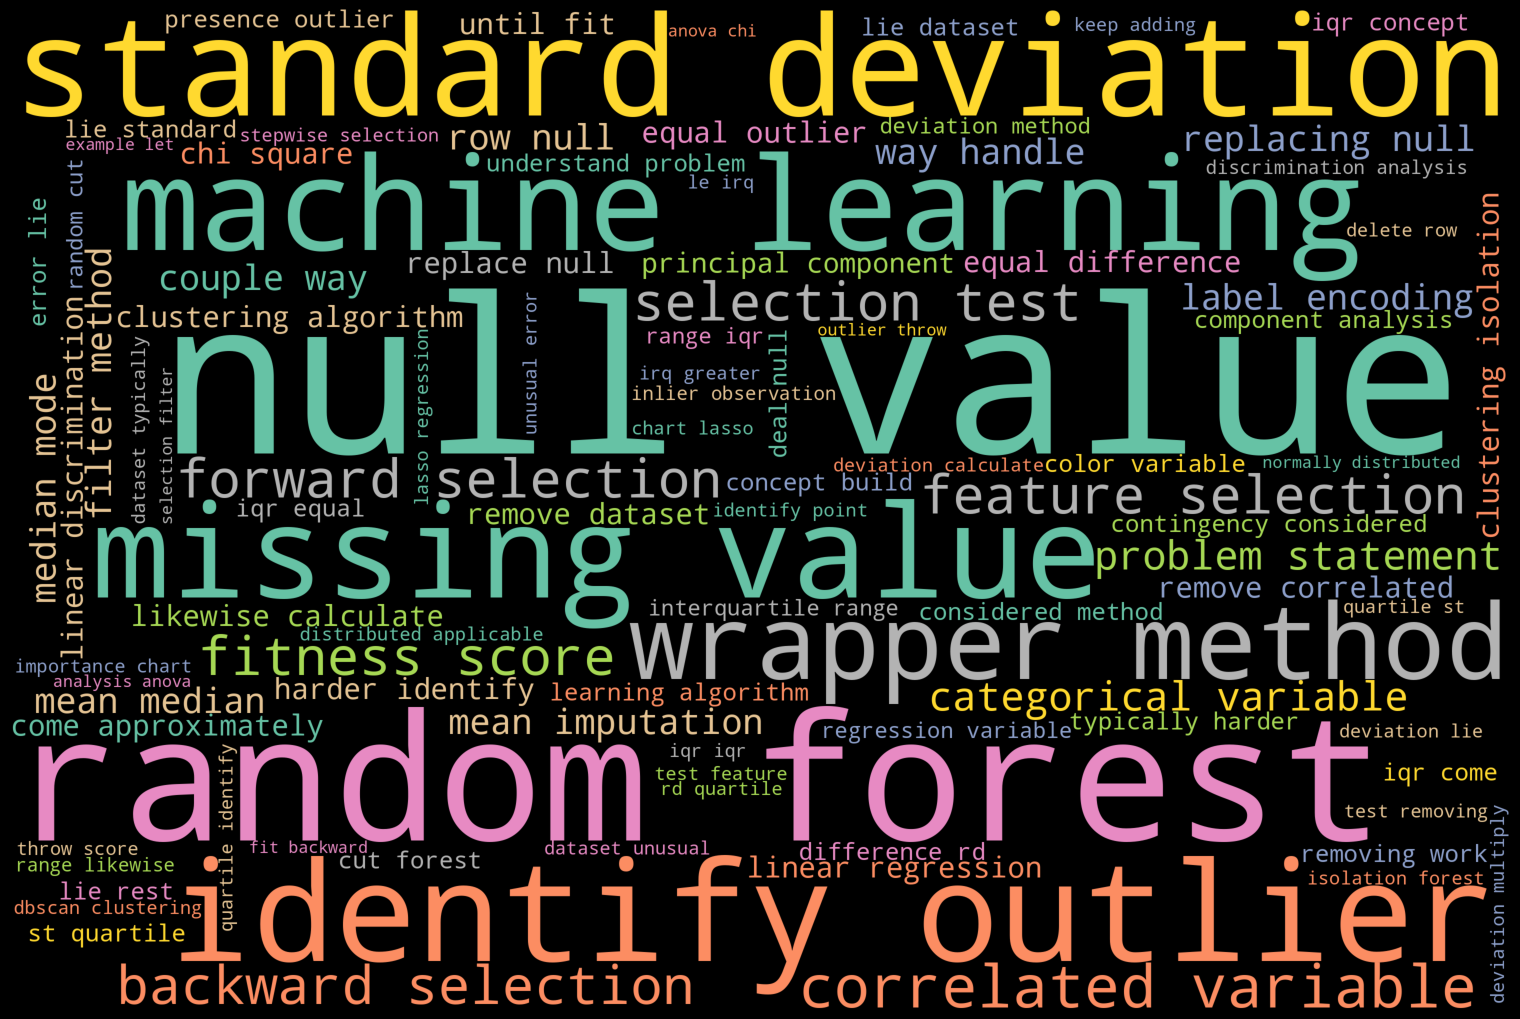

Cluster: Methodology


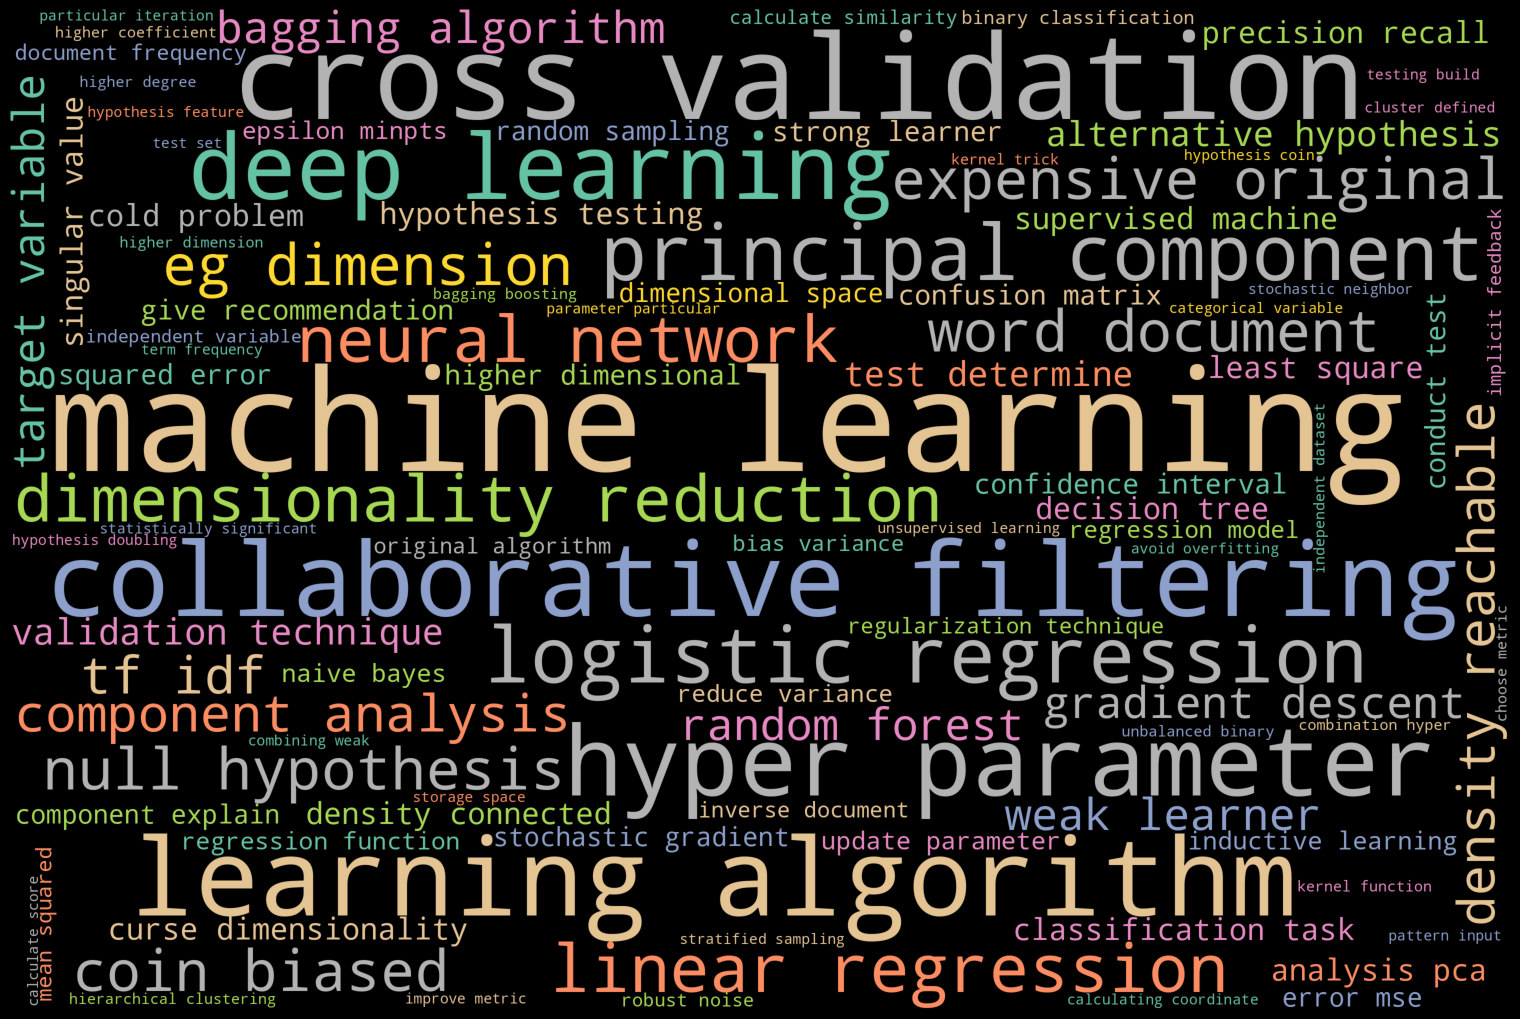

Cluster: Model


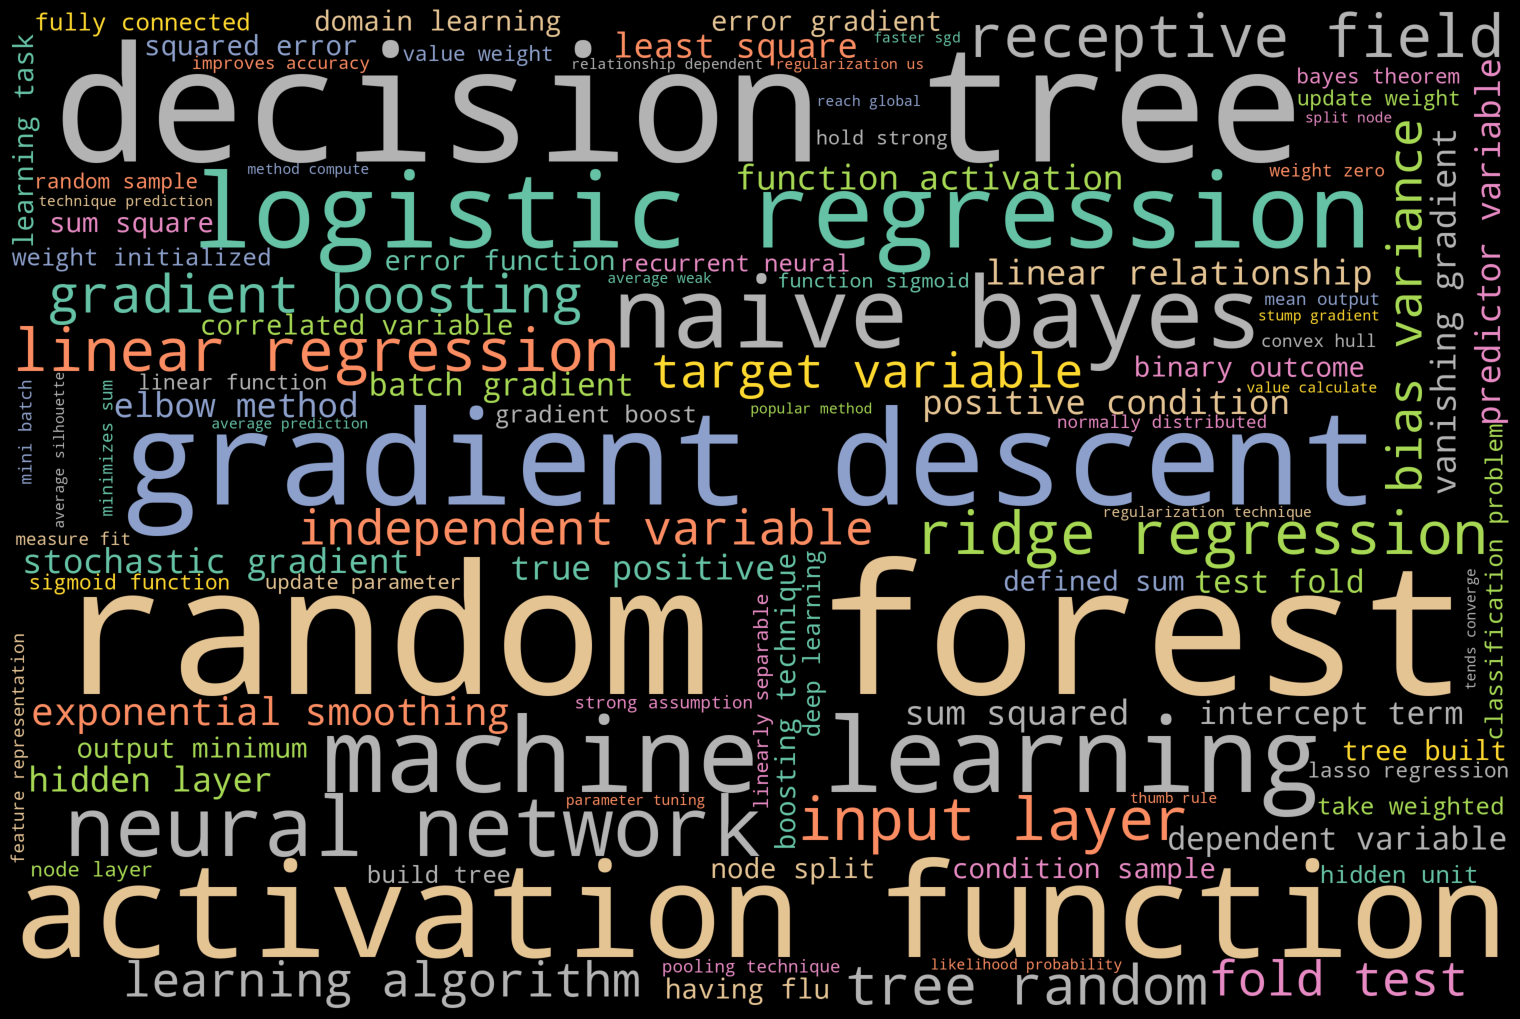

Cluster: Statistics


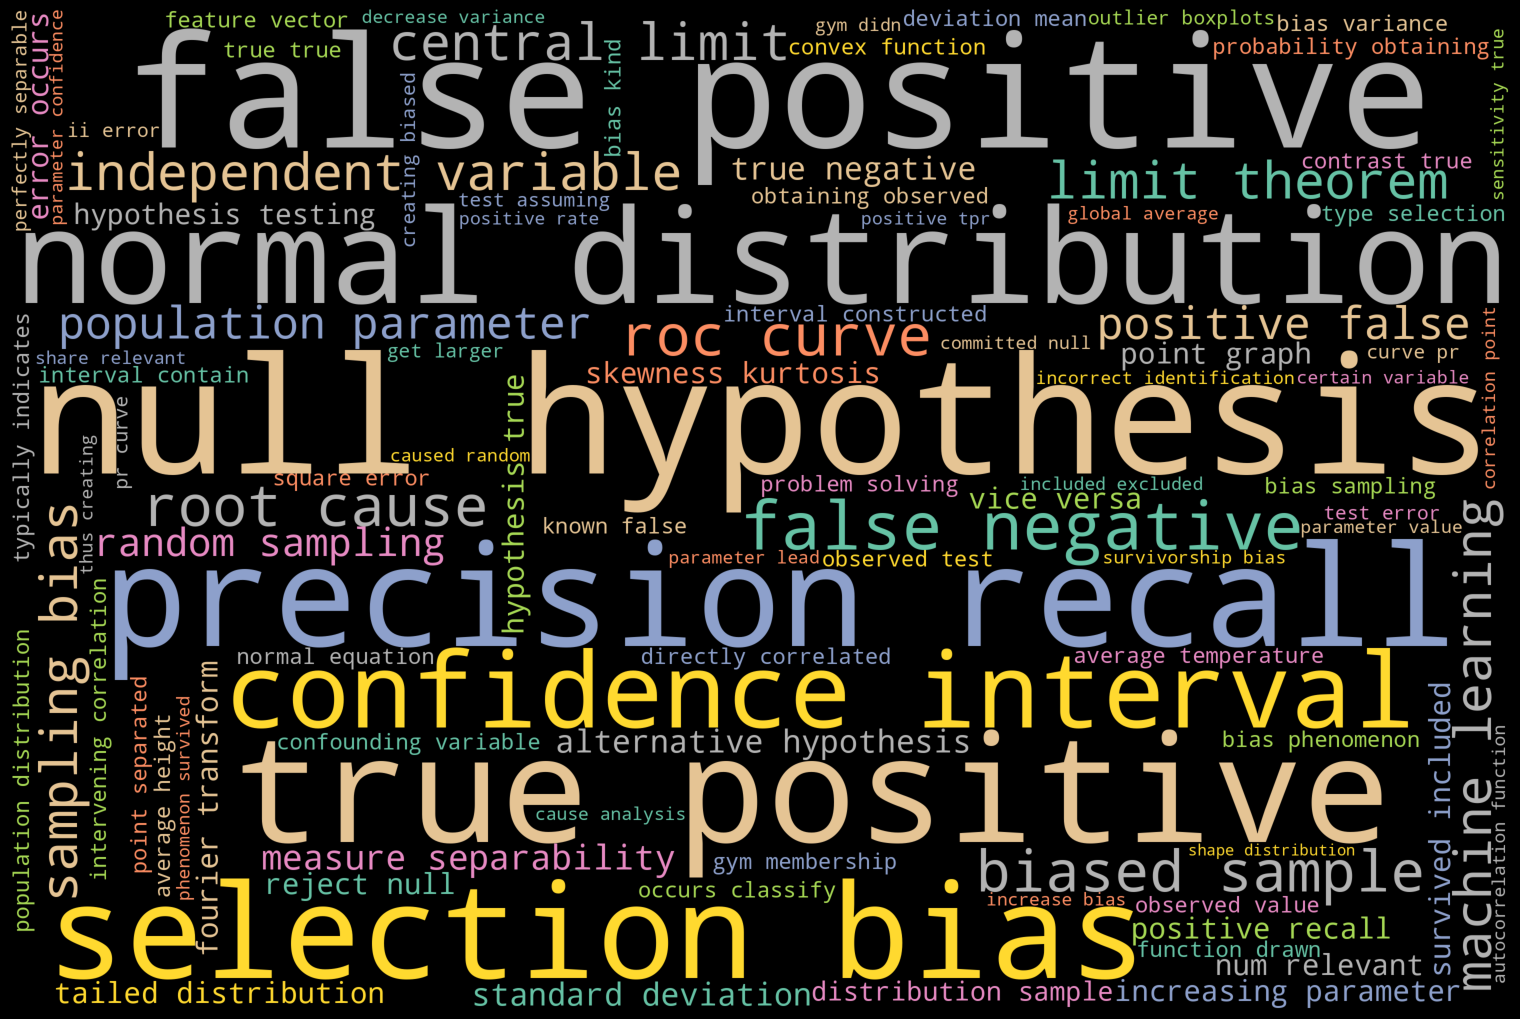

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
# Data visualization with bi-gram word clouds

for column in list(category.columns):
    cluster = data[data[column]==1]
    d = counter('Answers', column, cluster, 2, 2) # Select Questions or Answers
    frequency = d.T.to_dict('records')[0]
    wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100,
 random_state=1, colormap='Set2', collocations=False)
    wordcloud.generate_from_frequencies(frequencies=frequency)
    print('Cluster: {}'.format(column))
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

## 2.主題分類


運用主題模型

資料集: Data_Science_Interviews_NLP  
說明: 將dataset中每個問題找出最適合的分類數量&重新歸類  

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.0 MB/s eta 0:00:00


In [ ]:
import re
from nltk.corpus import stopwords

from pprint import pprint
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.matutils import corpus2csc

import pyLDAvis
import pyLDAvis.gensim_models

原dataset欄位有"Category","Questions","Answers"。 此任務只需要參考到Category、Questions。

In [ ]:
data = pd.read_csv("data.csv")  # 匯資料
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Questions,Answers
0,Linear Regression,What are the assumptions required for linear r...,There are four assumptions associated with a l...
1,Statistics,What is collinearity? What is multicollinearit...,Collinearity is a linear association between t...
2,Linear Regression,What are the drawbacks of a linear model?\n,There are a couple of drawbacks of a linear mo...
3,Linear Regression,What are ridge and lasso regression and what a...,Both L1 and L2 regularization are methods used...
4,KNN,How does K-Nearest Neighbor work?,K-Nearest Neighbors is a classification techni...
...,...,...,...
319,Neural Network,What are advantages and disadvantages of using...,Advantages:\n\nStore data on the entire networ...
320,Decision Trees,What is the default method for splitting in de...,"The default method is the Gini Index, which is..."
321,"XGBoost, SVM",Why does XGBoost perform better than SVM?,XGBoos is an ensemble method that uses many tr...
322,Neural Network,"For NLP, what’s the main purpose of using an e...",We use the encoder-decoder model to generate a...


### 保留Category和Questions欄位  
共有29種類別

In [ ]:
'''
mapping = {'Neural Network': 'Model', 'Linear Regression': 'Model', 'Decision Trees': 'Model', 'Naive Bayes': 'Model',
           'SVM': 'Model', 'Random Forest': 'Model', 'Logistic Regression': 'Model', 'Time Series': 'Model', 'KMeans': 'Model',
           'Gradient Boosting': 'Model', 'Linear Regression, Logistic Regression': 'Model', 'Random Forest, Gradient Boosting':'Model',
           'Random Forest, SVM':'Model', 'KMeans, KNN':'Model', 'XGBoost':'Model', 'Random Forest, Naive Bayes': 'Model', 'Gradient Boosting, Logistic Regression':'Model',
           'AdaBoost, Gradient Boost':'Model', 'KNN':'Model', 'Time Series, Decision Trees':'Model', 'XGBoost, Gradient Boosting':'Model',
           'Decision Trees, Time Series':'Model', 'XGBoost, SVM':'Model', 'KMeans, Methodology': 'Methodology', 'KNN, KMeans':'Model', 'Statistics ':'Statistics'}

data = data.replace({'Category': mapping})
'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\nmapping = {'Neural Network': 'Model', 'Linear Regression': 'Model', 'Decision Trees': 'Model', 'Naive Bayes': 'Model',\n           'SVM': 'Model', 'Random Forest': 'Model', 'Logistic Regression': 'Model', 'Time Series': 'Model', 'KMeans': 'Model',\n           'Gradient Boosting': 'Model', 'Linear Regression, Logistic Regression': 'Model', 'Random Forest, Gradient Boosting':'Model',\n           'Random Forest, SVM':'Model', 'KMeans, KNN':'Model', 'XGBoost':'Model', 'Random Forest, Naive Bayes': 'Model', 'Gradient Boosting, Logistic Regression':'Model',\n           'AdaBoost, Gradient Boost':'Model', 'KNN':'Model', 'Time Series, Decision Trees':'Model', 'XGBoost, Gradient Boosting':'Model',\n           'Decision Trees, Time Series':'Model', 'XGBoost, SVM':'Model', 'KMeans, Methodology': 'Methodology', 'KNN, KMeans':'Model', 'Statistics ':'Statistics'}\n\ndata = data.replace({'Category': mapping})\n"

In [ ]:
data = data[['Category','Questions']]
data = data.groupby('Category')['Questions'].apply(lambda x: " ".join(x)).reset_index()
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Questions
0,"AdaBoost, Gradient Boost",What’s the difference between an AdaBoosted tr...
1,Decision Trees,What is pruning in decision trees? Do you thin...
2,"Decision Trees, Time Series",What are the problems with using trees for sol...
3,EDA,Explain what the bootstrap sampling method is ...
4,Gradient Boosting,What is gradient boosting trees? Is it possibl...
5,"Gradient Boosting, Logistic Regression",Would you prefer gradient boosting trees model...
6,KMeans,How can you select k for k means? How can you ...
7,"KMeans, KNN","In k-means or kNN, we use euclidean distance t..."
8,"KMeans, Methodology",When would you choose K-means and when DBScan?
9,KNN,How does K-Nearest Neighbor work?


In [ ]:
set(data.Category)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'AdaBoost, Gradient Boost',
 'Decision Trees',
 'Decision Trees, Time Series',
 'EDA',
 'Gradient Boosting',
 'Gradient Boosting, Logistic Regression',
 'KMeans',
 'KMeans, KNN',
 'KMeans, Methodology',
 'KNN',
 'KNN, KMeans',
 'Linear Regression',
 'Linear Regression, Logistic Regression',
 'Logistic Regression',
 'Methodology',
 'Naive Bayes',
 'Neural Network',
 'Random Forest',
 'Random Forest, Gradient Boosting',
 'Random Forest, Naive Bayes',
 'Random Forest, SVM',
 'SVM',
 'Statistics',
 'Statistics ',
 'Time Series',
 'Time Series, Decision Trees',
 'XGBoost',
 'XGBoost, Gradient Boosting',
 'XGBoost, SVM'}

去除特殊符號

In [ ]:
data["Questions"] = data["Questions"].str.replace(r'[?".\']', "", regex=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


載入英文版的stopwords並且手動新增額外停用字


In [ ]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
newStops = ['dont', 'cant', 'wont', 'always', 'im','How','Why','What','model','explain','use','is','would','data','need','difference','cause','know','set','important','high','year']
stop_words.extend(newStops)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


把Question欄位內字串改為小寫並去除停用字

In [ ]:
data['Questions'] = data['Questions'].str.lower()
docs = [[word for word in doc.split() if word not in stop_words] for doc in data['Questions']]
len(docs)
docs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['what’s', 'adaboosted', 'tree', 'gradient', 'boosted', 'tree'],
 ['pruning',
  'decision',
  'trees',
  'think',
  '50',
  'small',
  'decision',
  'trees',
  'better',
  'large',
  'one',
  'decision',
  'tree',
  'running',
  'binary',
  'classification',
  'tree',
  'algorithm',
  'easy',
  'part',
  'tree',
  'splitting',
  'takes',
  'place',
  'ie',
  'tree',
  'decide',
  'variable',
  'split',
  'root',
  'node',
  'succeeding',
  'nodes',
  'steps',
  'making',
  'decision',
  'tree',
  'steps',
  'making',
  'decision',
  'tree',
  'benefits',
  'single',
  'decision',
  'tree',
  'compared',
  'complex',
  'models',
  'features',
  'decision',
  'tree',
  'default',
  'method',
  'splitting',
  'decision',
  'trees'],
 ['problems', 'using', 'trees', 'solving', 'time', 'series', 'problems'],
 ['bootstrap',
  'sampling',
  'method',
  'give',
  'example',
  'it’s',
  'used',
  'give',
  'several',
  'ways',
  'deal',
  'missing',
  'values',
  'mean',
  'imputation',
  'miss

In [ ]:
data.Category.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Category
AdaBoost, Gradient Boost                  1
Naive Bayes                               1
XGBoost, Gradient Boosting                1
XGBoost                                   1
Time Series, Decision Trees               1
Time Series                               1
Statistics                                1
Statistics                                1
SVM                                       1
Random Forest, SVM                        1
Random Forest, Naive Bayes                1
Random Forest, Gradient Boosting          1
Random Forest                             1
Neural Network                            1
Methodology                               1
Decision Trees                            1
Logistic Regression                       1
Linear Regression, Logistic Regression    1
Linear Regression                         1
KNN, KMeans                               1
KNN                                       1
KMeans, Methodology                       1
KMeans, KNN            

在 docs 裡面新增出現次數大於 5 次的 bigram

In [ ]:
# Compute bigrams.

# Add bigrams and trigrams   to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=5)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

print(dictionary)

Dictionary<877 unique tokens: ['adaboosted', 'boosted', 'gradient', 'tree', 'what’s']...>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Bag-of-words representation of the documents.
# 用 gensim ldamodel input 需要將文章轉換成 bag of words
corpus = [dictionary.doc2bow(doc) for doc in docs]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 建立模型

In [ ]:
t0 = time.time()

topic_num_list = np.arange(2, 16)
result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()


for topic_num in topic_num_list:
    # perplexity
    model = LdaModel(
        corpus = corpus,
        num_topics = topic_num ,
        id2word=dictionary,
        random_state = 1500,
        passes=5
        )

    loss = model.log_perplexity(corpus)
    pmi = CoherenceModel(model=model, texts=docs, coherence='c_npmi').get_coherence()
    perplexity = np.exp(-1. * loss)

    # model_set[f'k_{topic_num}'] = model

    result['topic_num'].append(topic_num)
    result['perplexity'].append(perplexity)
    result['pmi'].append(pmi)

print(f"花費時間: {time.time() - t0} sec")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


花費時間: 19.129714012145996 sec


In [ ]:
result = pd.DataFrame(result)
result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_num,perplexity,pmi
0,2,839.231852,-0.395248
1,3,853.280060,-0.371159
2,4,862.615993,-0.334895
3,5,888.261295,-0.302089
4,6,989.269118,-0.272438
5,7,862.854196,-0.269915
6,8,957.329896,-0.243073
7,9,1038.959101,-0.287286
8,10,1026.851845,-0.276143
9,11,1014.270172,-0.271547


Perplexity大約在分類數=2分類效果最好

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

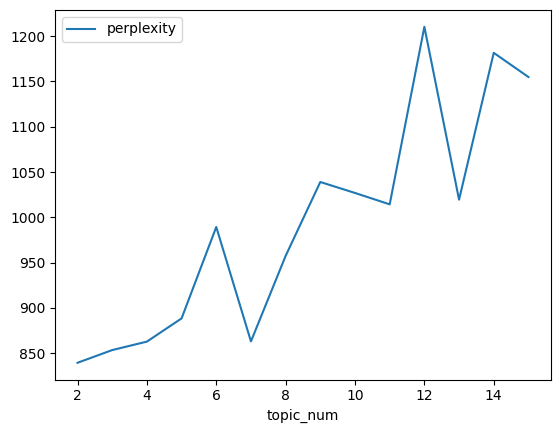

In [ ]:
result.plot.line(x='topic_num', y='perplexity')

PMI則是在分類數=8最好

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

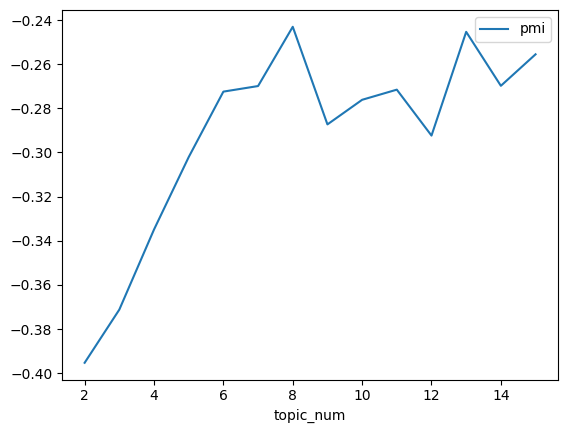

In [ ]:
result.plot.line(x='topic_num', y='pmi')

### 3. 視覺化結果
用主題數 3 來做 LDAvis 的結果範例

In [ ]:
model = LdaModel(
    corpus = corpus,
    num_topics = 3,
    id2word=dictionary,
    random_state = 1500,
    passes=5
    )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.074624  0.065861       1        1  61.256560
2      0.023662 -0.093385       2        1  20.509266
0     -0.098285  0.027523       3        1  18.234174, topic_info=               Term       Freq      Total Category  logprob  loglift
165      regression  17.000000  17.000000  Default  30.0000  30.0000
222          linear  10.000000  10.000000  Default  29.0000  29.0000
3              tree   8.000000   8.000000  Default  28.0000  28.0000
14         decision   7.000000   7.000000  Default  27.0000  27.0000
494          random   7.000000   7.000000  Default  26.0000  26.0000
..              ...        ...        ...      ...      ...      ...
40            trees   1.791344   7.025361   Topic3  -5.2376   0.3353
4            what’s   1.887531  15.631863   Topic3  -5.1853  -0.4122
36            steps   1.266593   4.094145   Topic3  -5.5842   0.5286
10   classification   1.275425   9.422156   Topic3  -5.5772  -0.2979
141            test   1.250184   6.498995   Topic3  -5.5972   0.0535

[168 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
271       1  0.775610         a/b
271       3  0.193903         a/b
275       1  0.774628    accuracy
275       2  0.193657    accuracy
623       1  0.785859  activation
...     ...       ...         ...
4         3  0.127944      what’s
183       1  0.979443        work
153       1  0.867826     working
620       2  0.575722     “naive”
606       1  0.786493         “y”

[185 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

### 主題
主題1: 籠統的機器學習及演算法相關  
主題2: 線性回歸、隨機森林相關  
主題3: 決策樹、ROC曲線

In [ ]:
pyLDAvis.save_html(p, "lda_en.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 主題分佈的應用，搭配其他Questions資訊

In [ ]:
# 取得每章的主題分佈
topics_doc = model.get_document_topics(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
m_theta = corpus2csc(topics_doc).T.toarray()
theta = pd.DataFrame(m_theta, columns=[f"topic_{i+1}" for i in range(m_theta.shape[1])])
theta

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_1,topic_2,topic_3
0,0.350497,0.599241,0.050261
1,0.988697,0.000000,0.000000
2,0.038971,0.921667,0.039362
3,0.000000,0.995885,0.000000
4,0.020641,0.955111,0.024248
5,0.026495,0.636590,0.336915
6,0.026611,0.027100,0.946288
7,0.937025,0.030466,0.032510
8,0.087730,0.596479,0.315791
9,0.084386,0.831343,0.084270


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

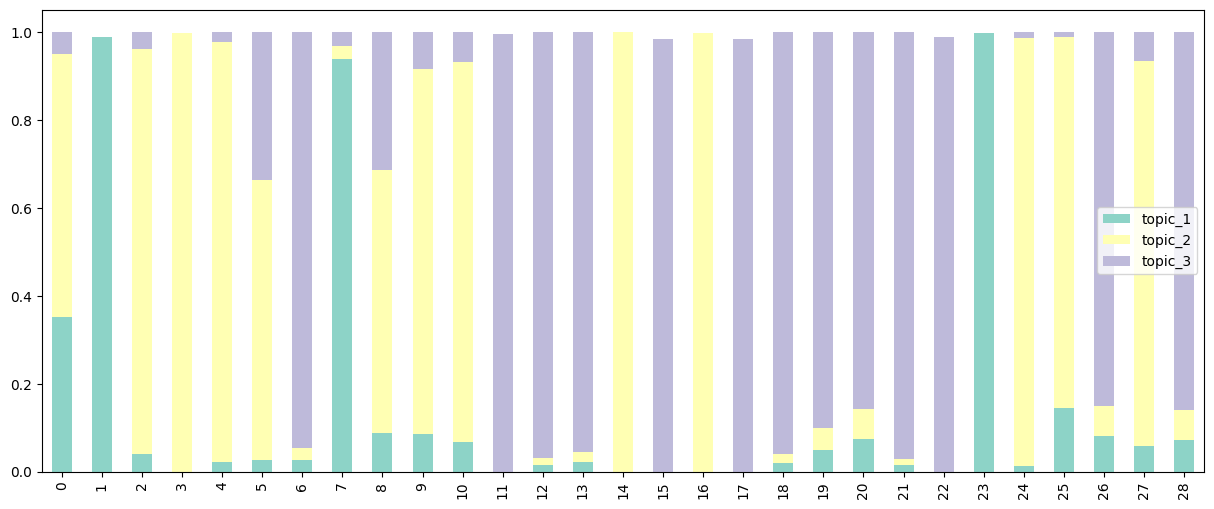

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
theta.plot.bar(ax=ax, stacked=True, color = plt.cm.Set3.colors)

### 結論
視覺上主題一佔比最少，主題二、三則佔比差不多，尤其主題三(決策樹、ROC曲線)集中在17-22號主題問題。  

由於原資料集本身就有做詳細歸類，實驗結果0-28類的都趨向一個主題獨佔，代表lda模型在主題預測上表良好。

## 3.找出相似題目



In [ ]:
!pip install scikit-learn-extra

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.8 MB/s eta 0:00:00


In [ ]:
 !pip install sentence-transformers
 !pip install transformers
 !pip install sentencepiece

 # 用於 transformer 加速
 !pip install accelerate
 !pip install -i https://pypi.org/simple/ bitsandbytes

 !pip install langchain-chroma
 !pip install pypdf
 !pip install langchain
 !pip install huggingface_hub
 !pip install grandalf
 !pip install pandas
 !pip install ctransformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install langchain-community langchain-core

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
# from nltk.corpus import stopwords
import numpy as np
from collections import defaultdict
import multiprocessing

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import torch
sns.set_style("darkgrid")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 讀取資料集

讀入DataScience interview資料集

In [ ]:
# 讀入資料集
origin_data = pd.read_csv('./data.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1. 找出相似題目
使用bert-large-cased做embeddings

install Sentence-Transformer 套件

In [ ]:
!pip install -U sentence-transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sentence_transformers import SentenceTransformer, models, util

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
# 回傳cosine similarity分數
def get_result_df(sentences, cosine_scores):

  result = []
  for i in range(len(sentences)):
      for j in range(i+1, len(sentences)):
          result.append([sentences[i], sentences[j], cosine_scores[i][j].item()])

  result_df = pd.DataFrame(result, columns=["sentence1", "sentence2", "score"])
  result_df = result_df.sort_values("score", ascending = False)

  return result_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### 使用embedding做NLP任務

bert-large-cased

In [ ]:
# 英文大小寫之分 bert-large-cased
bert_ch = SentenceTransformer('google-bert/bert-large-cased')
bert_ch.tokenizer.add_special_tokens({'pad_token': '[PAD]'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated 

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

0

#### 相似題目

In [ ]:
origin_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Questions,Answers
0,Linear Regression,What are the assumptions required for linear r...,There are four assumptions associated with a l...
1,Statistics,What is collinearity? What is multicollinearit...,Collinearity is a linear association between t...
2,Linear Regression,What are the drawbacks of a linear model?\n,There are a couple of drawbacks of a linear mo...
3,Linear Regression,What are ridge and lasso regression and what a...,Both L1 and L2 regularization are methods used...
4,KNN,How does K-Nearest Neighbor work?,K-Nearest Neighbors is a classification techni...
...,...,...,...
319,Neural Network,What are advantages and disadvantages of using...,Advantages:\n\nStore data on the entire networ...
320,Decision Trees,What is the default method for splitting in de...,"The default method is the Gini Index, which is..."
321,"XGBoost, SVM",Why does XGBoost perform better than SVM?,XGBoos is an ensemble method that uses many tr...
322,Neural Network,"For NLP, what’s the main purpose of using an e...",We use the encoder-decoder model to generate a...


In [ ]:
corpus_embeddings = bert_ch.encode(origin_data['Questions'], convert_to_tensor=True)

query_num = 6 # 指定文章

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = 5


query_embedding = bert_ch.encode(origin_data['Questions'][query_num], convert_to_tensor=True)

# We use cosine-similarity and torch.topk to find the highest 5 scores
cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
top_results = torch.topk(cos_scores, k=top_k)

print("\n\n======================\n\n")
print(f"Query: {origin_data['Questions'][query_num]}")
print("\n 資料集中前五相似的題目:")

for score, idx in zip(top_results[0], top_results[1]):
    category = origin_data['Category'][idx.item()]
    question = origin_data['Questions'][idx.item()]
    print(f"題目類別: {category:<28} 題目: {question:<50} (Score: {score:.4f})")

print("\n\n======================\n\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)






Query: Why is Naive Bayes “naive”?

 資料集中前五相似的題目:
題目類別: Naive Bayes                  題目: Why is Naive Bayes “naive”?                        (Score: 1.0000)
題目類別: Naive Bayes                  題目: Why is “Naive” Bayes naive?                        (Score: 0.8681)
題目類別: Naive Bayes                  題目: Why is naive Bayes so ‘naive’ ?                    (Score: 0.8501)
題目類別: Random Forest, Naive Bayes   題目: What are random forests? Why is Naive Bayes better? (Score: 0.6873)
題目類別: Neural Network               題目: What is model checkpointing?                       (Score: 0.6531)






In [ ]:
query_num = 29

query_embedding = bert_ch.encode(origin_data['Questions'][query_num], convert_to_tensor=True)

# We use cosine-similarity and torch.topk to find the highest 5 scores
cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
top_results = torch.topk(cos_scores, k=top_k)

print("\n\n======================\n\n")
print(f"Query: {origin_data['Questions'][query_num]}")
print("\n 資料集中前五相似的題目:")

for score, idx in zip(top_results[0], top_results[1]):
    category = origin_data['Category'][idx.item()]
    question = origin_data['Questions'][idx.item()]
    print(f"題目類別: {category:<28} 題目: {question:<50} (Score: {score:.4f})")

print("\n\n======================\n\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)






Query: What is the difference between a validation set and a test set?

 資料集中前五相似的題目:
題目類別: EDA                          題目: What is the difference between a validation set and a test set? (Score: 1.0000)
題目類別: Methodology                  題目: What error metric would you use to evaluate how good a binary classifier is? What if the classes are imbalanced? What if there are more than 2 groups? (Score: 0.8067)
題目類別: Methodology                  題目: In an A/B test, how can you check if assignment to the various buckets was truly random? (Score: 0.7942)
題目類別: Statistics                   題目: Is it possible capture the correlation between continuous and categorical variable? If yes, how? (Score: 0.7919)
題目類別: Statistics                   題目: Explain selection bias (with regard to a dataset, not variable selection). Why is it important? How can data management procedures such as missing data handling make it worse? (Score: 0.7899)






In [ ]:
query_num = 60

query_embedding = bert_ch.encode(origin_data['Questions'][query_num], convert_to_tensor=True)

# We use cosine-similarity and torch.topk to find the highest 5 scores
cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
top_results = torch.topk(cos_scores, k=top_k)

print("\n\n======================\n\n")
print(f"Query: {origin_data['Questions'][query_num]}")
print("\n 資料集中前五相似的題目:")

for score, idx in zip(top_results[0], top_results[1]):
    category = origin_data['Category'][idx.item()]
    question = origin_data['Questions'][idx.item()]
    print(f"題目類別: {category:<28} 題目: {question:<50} (Score: {score:.4f})")

print("\n\n======================\n\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)






Query: Give examples of data that does not have a Gaussian distribution, nor log-normal.

 資料集中前五相似的題目:
題目類別: Statistics                   題目: Give examples of data that does not have a Gaussian distribution, nor log-normal. (Score: 1.0000)
題目類別: Statistics                   題目: How do we check if a variable follows the normal distribution? (Score: 0.8353)
題目類別: Statistics                   題目: Explain what a long-tailed distribution is and provide three examples of relevant phenomena that have long tails. Why are they important in classification and regression problems? (Score: 0.8166)
題目類別: Statistics                   題目: Give an example where the median is a better measure than the mean (Score: 0.7943)
題目類別: Linear Regression, Logistic Regression 題目: OLS is to linear regression. Maximum likelihood is to logistic regression. Explain the statement. (Score: 0.7849)






# 四、結論

## 1.文字雲分析
我們先將Category內的主題分為4大類：
> a.EDA (Exploratory Data Analysis)探索性數據分析

> b.Methodology 方法學

> c.Model

> d.Statistics

透過四個不同的類別分別作為關鍵字，快速了解面試時遇到此類別問題時可以優先考慮，應該用什麼詞作為回答的核心，以此做為延伸。

以下四個類別的圖片皆取自三-1文字雲的視覺化資料。

### a. EDA (Exploratory Data Analysis)探索性數據分析
**null value為最常出現的詞，random forest、standard deviation、identify outlier、mechine learning等也十分常出現。**



我們推測進行EDA時，null value的處理會影響資料的精確，因此回答問題時容易特別被提及，同時random forest可以處理null value因此也容易被提及，其餘較常出現的詞也是基於類似原因所以頻率較高。






### b. Methodology 方法學
**mechine learning為最常出現的詞，learning algorithm、collaborative filtering、cross validation等也十分常出現。**

我們推測Methodology類別的問題都和數據分析、機器學習的方法有關連，作為較基本的存在於資料科學本身及應用領域，因此時常為問題的關鍵。

### c. Model 模型
**random forest為最常出現的詞，decision tree、activation function、gradient descent、logistic regression等也十分常出現。**

這些都是於數據進行訓練和預測的模型方法，且被廣泛運用在機器學的領域中，因此在此範圍的問題內成為具有代表性的高頻率詞句。



### d. Statistics 統計
**null hypothesis為最常出現的詞，true positive、normal distribution、false positive、precision recall等也十分常出現。**

Statistics相關的問題最注重假設是十分合理的，另外True Positive、False Positive、Precision Recall皆用於評估模型的性能，弱勢問題在統計領域皆是關鍵回答主題。

## 2.主題分類分析
此部份我們以Category和Questions欄位維分析目標，在建立模型後
> Perplexity大約在分類數=2分類效果最好

> PMI則是在分類數=8最高

透過LDAvis，我們設計主題數量為3，得到以下結果：
> 主題1: 籠統的機器學習及演算法相關

> 主題2: 線性回歸、隨機森林相關

> 主題3: 決策樹、ROC曲線

取得每章的主題分佈後我們可以發現：

視覺上主題一佔比最少，主題二、三則佔比差不多，尤其主題三(決策樹、ROC曲線)集中在17-22號主題問題。

由於原資料集本身就有做詳細歸類，實驗結果0-28類的都趨向一個主題獨佔，代表lda模型在主題預測上表良好。

## 3.尋找相似題目

我們使用bert-large-cased做embeddings，再使用embedding做NLP任務，得到問題集內其實有不少問題是相似的。